# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis

Import required Python packages.

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

print("Imports Done!")

Imports Done!


Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [2]:
DATA = "~/PycharmProjects/Datasets/"
mtcar_path = DATA + "mtcars.csv"
mtcar = pd.read_csv(mtcar_path)

In [3]:
mtcar.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcar.shape

(32, 12)

In [5]:
mtcar.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
mtcar_df = mtcar.copy()

In [7]:
mtcar_df = mtcar_df.rename(columns={"Unnamed: 0" : "Car Model"})

In [8]:
mtcar_df["vs"] = mtcar_df["vs"].replace({0 : "V", 1 : "S"})

In [9]:
mtcar_df["am"] = mtcar_df["am"].replace({0 : "Auto", 1 : "Manual"})

In [10]:
result = mtcar_df["qsec"][(mtcar_df["cyl"] != 3) & (mtcar_df["mpg"] > 20)].mean()
result

18.81642857142857

In [11]:
mtcar_df.groupby(["vs", "am"]).agg({"hp" : "mean"})

hp
vs am                
S  Auto    102.142857
   Manual   80.571429
V  Auto    194.166667
   Manual  180.833333

In [12]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [13]:
mtcar_df.groupby("am").agg("median")

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
am,,,,,,,,,
Auto,17.3,8,275.8,175,3.15,3.52,17.82,3,3
Manual,22.8,4,120.3,109,4.08,2.32,17.02,4,2


In [14]:
mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

mpg       disp
am     vs                     
Auto   S   2.471071  49.130725
       V   2.774396  71.823494
Manual S   4.757701  18.802128
       V   4.008865  95.233616

In [15]:
my_stats = mtcar_df.groupby(["am", "vs"]).agg("std").iloc[:,[0,2]]

In [16]:
descriptions_stat = mtcar_df.groupby(["am"]).agg("std").loc[:, ["hp", "disp"]]
descriptions_stat

,hp,disp
am,,
Auto,53.908196,110.171647
Manual,84.062324,87.203989


In [17]:
round(mtcar_df.groupby(["am", "vs"]).agg({"qsec" : ["count", "min", "max", "mean", "std", "sem"]}), 2)

qsec                                 
          count    min    max   mean   std   sem
am     vs                                       
Auto   S      7  18.30  22.90  19.97  1.46  0.55
       V     12  15.41  18.00  17.14  0.80  0.23
Manual S      7  16.90  19.90  18.70  0.95  0.36
       V      6  14.50  17.02  15.80  1.09  0.45

In [18]:
mtcar_df.isna().sum()

Car Model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

Dealing with NA 

In [19]:
# mtcar_df.head(15)

In [20]:
# mtcar_df["mpg"].mean()

In [21]:
# mtcar_df["mpg"].iloc[1:10] = None

In [22]:
# mtcar_df.head(15)

In [23]:
# mtcar_df["mpg"].mean()

<AxesSubplot:xlabel='mpg', ylabel='Count'>

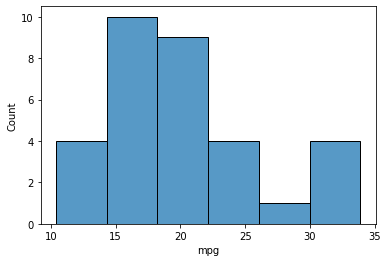

In [24]:
sns.histplot(mtcar_df["mpg"])

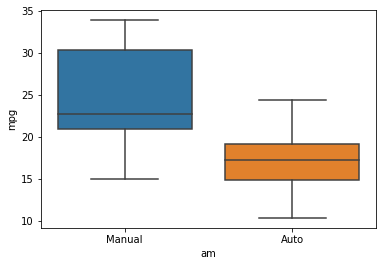

In [25]:
ax = sns.boxplot(x="am", y="mpg", data=mtcar_df)

<AxesSubplot:xlabel='mpg', ylabel='hp'>

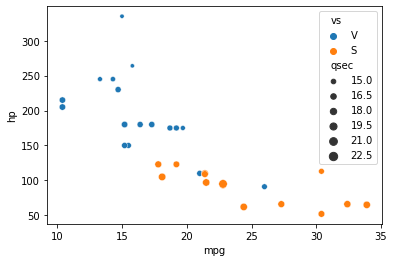

In [26]:
sns.scatterplot(data=mtcar_df, x="mpg", y="hp", hue="vs", size= "qsec")

<AxesSubplot:xlabel='mpg', ylabel='disp'>

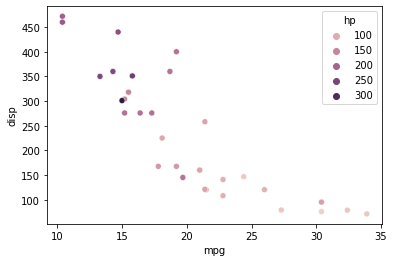

In [27]:
sns.scatterplot(data=mtcar_df, x="mpg", y="disp", hue="hp")

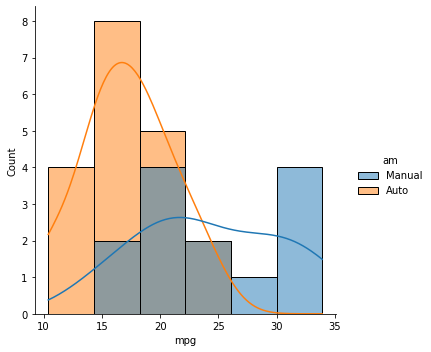

In [28]:
sns.displot(data=mtcar_df, x="mpg", hue="am", kde=True)

### NEW DATASET 

In [29]:
DATA = "~/PycharmProjects/Datasets/"
airquality_path = DATA + "airquality.csv"
airquality = pd.read_csv(airquality_path)

In [30]:
airquality = airquality.drop("Unnamed: 0", axis=1)

In [31]:
airquality.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [32]:
airquality_df = airquality.copy()

In [33]:
airquality_df.loc[airquality_df.Month >= 7]
# ИЛИ
airquality_df.query("Month >= 7")

,Ozone,Solar.R,Wind,Temp,Month,Day
61,135.0,269.0,4.1,84,7,1
62,49.0,248.0,9.2,85,7,2
63,32.0,236.0,9.2,81,7,3
64,NaN,101.0,10.9,84,7,4
65,64.0,175.0,4.6,83,7,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [34]:
aq_ss = airquality_df.query("Month >= 7")

In [35]:
aq_ss.groupby("Month").agg({"Ozone" : "count"})
# ИЛИ 
# airquality_df.query("Month >= 7").groupby("Month").agg({"Ozone" : "count"})

,Ozone
Month,
7,26
8,26
9,29


<AxesSubplot:xlabel='Month', ylabel='Ozone'>

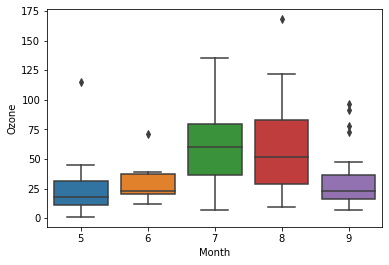

In [36]:
sns.boxplot(x="Month", y="Ozone", data=airquality_df)

### NEW DATASET

In [37]:
DATA = "~/PycharmProjects/Datasets/"
iris_path = DATA + "iris.csv"
iris = pd.read_csv(iris_path)

In [38]:
iris = iris.drop("Unnamed: 0", axis=1)

In [39]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [40]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
iris.agg("std")

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [42]:
iris[iris.Species == "virginica"].median().sort_values(ascending=False)

Sepal.Length    6.50
Petal.Length    5.55
Sepal.Width     3.00
Petal.Width     2.00
dtype: float64

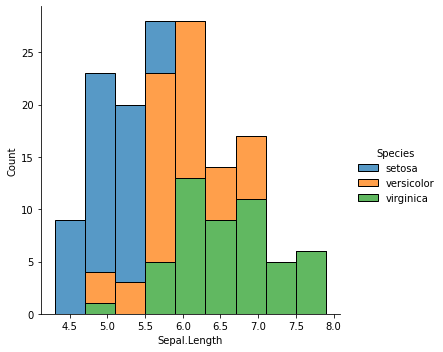

In [43]:
sns.displot(data=iris, x="Sepal.Length", hue="Species", multiple="stack")

## NEW CHAPTER AND NEW DATASET

In [44]:
DATA = "/home/aleksey/PycharmProjects/Datasets/"
grants_path = DATA + "grants.csv"
grants = pd.read_csv(grants_path)

In [45]:
grants.head()

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,1
1,1.0,< 5,51.0,bio,270106,24999.5,0
2,1.0,< 5,36.0,bio,270708,24999.5,0
3,1.0,5-10,46.0,bio,270603,24999.5,0
4,4.0,> 10,46.0,physics,240402,24999.5,1


In [46]:
grants.shape

(1420, 7)

In [47]:
grants.isna().sum()

npersons          7
years_in_uni      0
oldest_age       57
field             0
RFCD.Code.1       0
midpoint        586
status            0
dtype: int64

In [48]:
grants.describe()

,npersons,oldest_age,RFCD.Code.1,midpoint,status
count,1413.000000,1363.000000,1420.000000,834.000000,1420.000000
mean,1.991507,46.220103,283534.757746,56534.272182,0.473944
std,1.402623,10.049217,43515.351061,84821.226389,0.499497
min,1.000000,25.000000,240100.000000,24999.500000,0.000000
25%,1.000000,38.000000,270103.000000,24999.500000,0.000000
50%,2.000000,46.000000,270210.000000,24999.500000,0.000000
75%,2.000000,53.000000,270702.000000,49999.500000,1.000000
max,15.000000,77.000000,380399.000000,499999.500000,1.000000


In [49]:
grants_df = grants.copy()

In [50]:
grants_df["status"] = grants_df["status"].replace({0 : "Not funded", 1 : "Funded"})

In [51]:
grants_df["status"].unique()

array(['Funded', 'Not funded'], dtype=object)

In [52]:
grants_df.head(3)

,npersons,years_in_uni,oldest_age,field,RFCD.Code.1,midpoint,status
0,2.0,< 5,66.0,bio,270799,24999.5,Funded
1,1.0,< 5,51.0,bio,270106,24999.5,Not funded
2,1.0,< 5,36.0,bio,270708,24999.5,Not funded


In [53]:
table_1 = pd.pivot_table(grants_df, index="status", values="field", aggfunc="count")
table_1

,field
status,
Funded,673
Not funded,747


In [54]:
table_2 = pd.pivot_table(grants_df, index=["field"], columns=["status"], aggfunc="count")
table_2

RFCD.Code.1            midpoint            npersons             \
status       Funded Not funded   Funded Not funded   Funded Not funded   
field                                                                    
beh_cog          65        100       52         25       65         99   
bio             432        473      374        192      431        470   
chem             66         60       58         18       66         60   
physics          78         70       60         15       77         70   
soc              32         44       30         10       32         43   

        oldest_age            years_in_uni             
status      Funded Not funded       Funded Not funded  
field                                                  
beh_cog         61         97           65        100  
bio            423        450          432        473  
chem            64         58           66         60  
physics         76         62           78         70  
soc             32         40           32         44

In [55]:
# Неудачные попытки
# -----------------------------
# grants_df.groupby(["field", "status"]).agg({"status" : "count"}).unstack()
# -----------------------------
# table_2 = grants_df.pivot_table(index="status", columns=["field"], aggfunc="count")
# table_2

In [56]:
dist = grants_df.groupby(["field", "status"])["status"].count().unstack()
dist

status,Funded,Not funded
field,,
beh_cog,65,100
bio,432,473
chem,66,60
physics,78,70
soc,32,44


In [57]:
# Binom test
p_value_1 = scipy.stats.binom_test(table_1)
p_value_1

array([0.05268034])

In [58]:
# ChiSquare test
cs_res_1 = scipy.stats.chisquare(table_1)
print(cs_res_1)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_1[0], cs_res_1[1]))

Power_divergenceResult(statistic=array([3.85633803]), pvalue=array([0.04955838]))
The chi-squared test statistic is [3.85633803]; 
The p-value of the test is [0.04955838].


In [59]:
cs_res_2 = scipy.stats.chisquare(dist.T)
cs_res_2

Power_divergenceResult(statistic=array([7.42424242, 1.85745856, 0.28571429, 0.43243243, 1.89473684]), pvalue=array([0.00643509, 0.17291841, 0.5929801 , 0.5107978 , 0.16866862]))

### New Dataset

In [60]:
DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path)

In [61]:
hec = hec.drop("Unnamed: 0", axis=1)

In [62]:
hec.head()

,Hair,Eye,Sex,Freq
0,Black,Brown,Male,32
1,Brown,Brown,Male,53
2,Red,Brown,Male,10
3,Blond,Brown,Male,3
4,Black,Blue,Male,11


In [63]:
hec_fem = hec[hec.Sex == "Female"]
hec_fem

,Hair,Eye,Sex,Freq
16,Black,Brown,Female,36
17,Brown,Brown,Female,66
18,Red,Brown,Female,16
19,Blond,Brown,Female,4
20,Black,Blue,Female,9
21,Brown,Blue,Female,34
22,Red,Blue,Female,7
23,Blond,Blue,Female,64
24,Black,Hazel,Female,5
25,Brown,Hazel,Female,29


In [64]:
# Неудачные попытки
# sns.histplot(data=hec_fem, x="Hair", y="Freq")

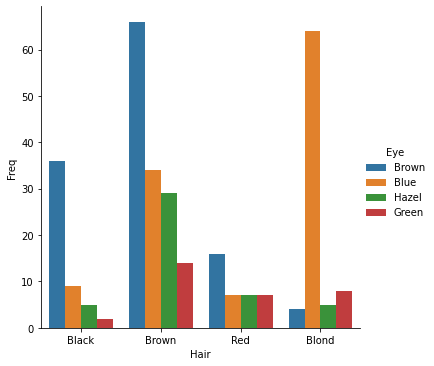

In [65]:
sns.catplot(data=hec_fem, x="Hair", y="Freq", hue="Eye", kind="bar")

In [66]:
# Как сделать хорошо и правильно? - Посмотри туториалы.
# titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

In [67]:
hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]]

,Eye,Freq
17,Brown,66
21,Blue,34
25,Hazel,29
29,Green,14


In [68]:
brown_haired_ladies = hec_fem[hec_fem.Hair == "Brown"].iloc[:,[1, 3]].set_index("Eye")
brown_haired_ladies

,Freq
Eye,
Brown,66
Blue,34
Hazel,29
Green,14


In [69]:
cs_res_3 = scipy.stats.chisquare(brown_haired_ladies)
print(cs_res_3)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(cs_res_3[0], cs_res_3[1]))

Power_divergenceResult(statistic=array([40.18881119]), pvalue=array([9.71700305e-09]))
The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


In [70]:
import pandas as pd
import scipy.stats

DATA = "~/PycharmProjects/Datasets/"
hec_path = DATA + "HairEyeColor.csv"
hec = pd.read_csv(hec_path, index_col=0)
brown_haired_ladies = hec.query("Sex == 'Female' and Hair == 'Brown'").iloc[:,[1, 3]].set_index("Eye")
chisquare_result = scipy.stats.chisquare(brown_haired_ladies)
print("The chi-squared test statistic is {}; \nThe p-value of the test is {}.".format(chisquare_result[0], chisquare_result[1]))

The chi-squared test statistic is [40.18881119]; 
The p-value of the test is [9.71700305e-09].


### New Dataset

In [71]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [72]:
diamonds = diamonds.sort_values(by=['color', 'cut'])

<AxesSubplot:xlabel='color', ylabel='Count'>

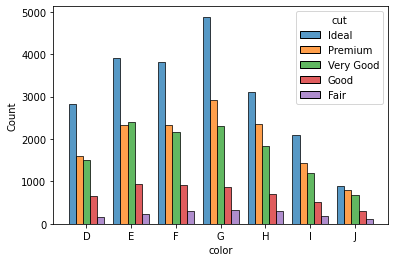

In [73]:
sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.8)

In [74]:
# import seaborn as sns

# diamonds = sns.load_dataset('diamonds')
# diamonds = diamonds.sort_values(by=['color', 'cut'])
# sns.histplot(data=diamonds, x="color", hue="cut", multiple="dodge", shrink=.7)

In [75]:
# Предполагается, что Вы уже скачали необходимый датасет и знаете путь до него
import pandas as pd
import scipy.stats
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds = pd.DataFrame(diamonds)
# d = diamonds.groupby(['cut', 'color']).agg({"color" : "count"}).unstack()
d = diamonds.groupby(['cut', 'color'])['cut'].count().unstack()
d

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [76]:
# НЕПРАВИЛЬНО!
chisquare_result = scipy.stats.chisquare(d, axis=None)
chisquare_result

Power_divergenceResult(statistic=33226.32814238043, pvalue=0.0)